In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [2]:
ep = pd.read_csv("gtdb-rs202.evolpaths.protein.csv.gz")
ep

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm ident,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani ANI,num_bidirectional_fragment_mappings,total_query_fragments,minContain AAI,avgContain AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,1,0.253707,0.606440,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.843463,0.887253
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.257015,0.615836,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844403,0.888747
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844570,0.888084
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,1,0.027498,0.084305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629586,0.665965
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,100,0.027745,0.084447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630662,0.666588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368545,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,100,0.001703,0.003699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592279,0.596669
368546,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200
368547,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,1,0.000687,0.001424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547567,0.549325
368548,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,100,0.000427,0.000885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524458,0.526113


In [3]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'jani_low', 'jani_high', 'containA AAI', 'containAani_low',
       'containAani_high', 'containB AAI', 'containBani_low',
       'containBani_high', 'maxContain AAI', 'mcANI_low', 'mcANI_high',
       'alpha-ksize', 'compareM AAI', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani ANI',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'minContain AAI', 'avgContain AAI'],
      dtype='object')

In [4]:
prot_only = ep[ep["alphabet"] == "protein"]
prot_only = prot_only[prot_only["compareM AAI"].notna()] # only grab comparisons we can work with
prot_only

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm ident,ANIm_coverage,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani ANI,num_bidirectional_fragment_mappings,total_query_fragments,minContain AAI,avgContain AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,1,0.253707,0.606440,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.843463,0.887253
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.257015,0.615836,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844403,0.888747
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,0.947258,0.621303,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844570,0.888084
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,1,0.027498,0.084305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629586,0.665965
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,100,0.027745,0.084447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630662,0.666588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368545,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,100,0.001703,0.003699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592279,0.596669
368546,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200
368547,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,1,0.000687,0.001424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547567,0.549325
368548,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,100,0.000427,0.000885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524458,0.526113


In [5]:
prot_only[["compareM AAI", "compareM_std_aai", "jani_low", "jani_high"]]

,compareM AAI,compareM_std_aai,jani_low,jani_high
0,0.9242,0.0952,0.878125,0.879436
1,0.9242,0.0952,0.876950,0.883182
2,0.9242,0.0952,0.875328,0.884076
3,0.6116,0.1285,0.656489,0.659939
4,0.6116,0.1285,0.650283,0.667869
...,...,...,...,...
368545,0.4496,0.0983,0.577873,0.615702
368546,0.4496,0.0983,0.574786,0.626414
368547,0.4195,0.0879,0.544589,0.554095
368548,0.4195,0.0879,0.495990,0.558073


In [6]:
def aai_in_ci(row):
    row["aai_in_mc_ci"] = False
    row["aai_in_jaccard_ci"] = False
    compareM_mean = float(row["compareM AAI"])
    compareM_stdev = float(row["compareM_std_aai"])
    compareM_low = compareM_mean - compareM_stdev
    compareM_high = compareM_mean + compareM_stdev
    mc_low = float(row["mcANI_low"])
    mc_high = float(row["mcANI_high"])
    if (mc_low <= compareM_low) & (compareM_high <= mc_high):
        row["aai_in_mc_ci"] = True
    jaai_low = float(row["jani_low"])
    jaai_high = float(row["jani_high"])
    if (jaai_low <= compareM_low) & (compareM_high <= jaai_high):
        row["aai_in_jaccard_ci"] = True
    return row

In [7]:
prot_only = prot_only.progress_apply(aai_in_ci, axis=1)
prot_only

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 366600/366600 [06:25<00:00, 951.56it/s]


,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani ANI,num_bidirectional_fragment_mappings,total_query_fragments,minContain AAI,avgContain AAI,aai_in_mc_ci,aai_in_jaccard_ci
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,1,0.253707,0.606440,...,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.843463,0.887253,False,False
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.257015,0.615836,...,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844403,0.888747,False,False
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,200,0.256108,0.608974,...,1520244.0,80181.0,0.588534,0.94634,427.0,487.0,0.844570,0.888084,False,False
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,1,0.027498,0.084305,...,NaN,NaN,NaN,NaN,NaN,NaN,0.629586,0.665965,False,False
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,protein,7,100,0.027745,0.084447,...,NaN,NaN,NaN,NaN,NaN,NaN,0.630662,0.666588,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368545,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,100,0.001703,0.003699,...,NaN,NaN,NaN,NaN,NaN,NaN,0.592279,0.596669,False,False
368546,GCA_002409405.1_x_GCA_003567135.1,GCA_002409405.1,GCA_003567135.1,path999,phylum,protein,11,200,0.001819,0.003919,...,NaN,NaN,NaN,NaN,NaN,NaN,0.596179,0.600200,False,False
368547,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,1,0.000687,0.001424,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547567,0.549325,False,False
368548,GCA_002409405.1_x_GCF_004319585.1,GCA_002409405.1,GCF_004319585.1,path999,superkingdom,protein,11,100,0.000427,0.000885,...,NaN,NaN,NaN,NaN,NaN,NaN,0.524458,0.526113,False,False


In [8]:
in_mcCI = prot_only[prot_only["aai_in_mc_ci"] ==True]
in_mcCI

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani ANI,num_bidirectional_fragment_mappings,total_query_fragments,minContain AAI,avgContain AAI,aai_in_mc_ci,aai_in_jaccard_ci
5162,GCA_011375875.1_x_GCA_000746785.1,GCA_011375875.1,GCA_000746785.1,path105,phylum,protein,8,200,0.000308,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391310,0.397214,True,True
6152,GCA_011053855.1_x_GCA_000746785.1,GCA_011053855.1,GCA_000746785.1,path106,phylum,protein,8,200,0.000313,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.392870,0.397994,True,True
17132,GCA_013153105.1_x_GCA_000746785.1,GCA_013153105.1,GCA_000746785.1,path117,phylum,protein,8,200,0.000309,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391851,0.397484,True,True
21185,GCA_003086555.1_x_GCF_000023945.1,GCA_003086555.1,GCF_000023945.1,path121,superkingdom,protein,8,200,0.000172,0.000762,...,NaN,NaN,NaN,NaN,NaN,NaN,0.349469,0.378546,True,False
25142,GCA_011053655.1_x_GCA_000746785.1,GCA_011053655.1,GCA_000746785.1,path125,phylum,protein,8,200,0.000329,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.397449,0.400283,True,True
28112,GCA_011372985.1_x_GCA_000746785.1,GCA_011372985.1,GCA_000746785.1,path128,phylum,protein,8,200,0.000270,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.380729,0.391923,True,True
31172,GCA_002508315.1_x_GCA_000746785.1,GCA_002508315.1,GCA_000746785.1,path131,phylum,protein,8,200,0.000304,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.390379,0.396748,True,True
164714,GCA_000991805.1_x_GCA_009778015.1,GCA_000991805.1,GCA_009778015.1,path2646,phylum,protein,7,200,0.000606,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.381005,0.383196,True,True
164894,GCA_012514355.1_x_GCA_009778015.1,GCA_012514355.1,GCA_009778015.1,path2648,phylum,protein,7,200,0.000569,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.374551,0.379969,True,False
170474,GCA_001820175.1_x_GCA_009778015.1,GCA_001820175.1,GCA_009778015.1,path2703,phylum,protein,7,200,0.000541,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.369769,0.377578,True,True


In [9]:
in_mcCI.groupby(["scaled", "ksize"])[["aai_in_mc_ci"]].describe()

aai_in_mc_ci                  
                    count unique   top freq
scaled ksize                               
200    7                5      1  True    5
       8                7      1  True    7

In [10]:
in_jCI = prot_only[prot_only["aai_in_jaccard_ci"] ==True]
in_jCI

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,ANIm_aln_length,ANIm_sim_errors,ANIm_hadamard,fastani ANI,num_bidirectional_fragment_mappings,total_query_fragments,minContain AAI,avgContain AAI,aai_in_mc_ci,aai_in_jaccard_ci
5162,GCA_011375875.1_x_GCA_000746785.1,GCA_011375875.1,GCA_000746785.1,path105,phylum,protein,8,200,0.000308,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391310,0.397214,True,True
6152,GCA_011053855.1_x_GCA_000746785.1,GCA_011053855.1,GCA_000746785.1,path106,phylum,protein,8,200,0.000313,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.392870,0.397994,True,True
17132,GCA_013153105.1_x_GCA_000746785.1,GCA_013153105.1,GCA_000746785.1,path117,phylum,protein,8,200,0.000309,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.391851,0.397484,True,True
25142,GCA_011053655.1_x_GCA_000746785.1,GCA_011053655.1,GCA_000746785.1,path125,phylum,protein,8,200,0.000329,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.397449,0.400283,True,True
28112,GCA_011372985.1_x_GCA_000746785.1,GCA_011372985.1,GCA_000746785.1,path128,phylum,protein,8,200,0.000270,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.380729,0.391923,True,True
31172,GCA_002508315.1_x_GCA_000746785.1,GCA_002508315.1,GCA_000746785.1,path131,phylum,protein,8,200,0.000304,0.000697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.390379,0.396748,True,True
55853,GCA_009778915.1_x_GCF_004319585.1,GCA_009778915.1,GCF_004319585.1,path1557,superkingdom,protein,9,200,0.000138,0.000509,...,NaN,NaN,NaN,NaN,NaN,NaN,0.385616,0.408106,False,True
164714,GCA_000991805.1_x_GCA_009778015.1,GCA_000991805.1,GCA_009778015.1,path2646,phylum,protein,7,200,0.000606,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.381005,0.383196,True,True
170474,GCA_001820175.1_x_GCA_009778015.1,GCA_001820175.1,GCA_009778015.1,path2703,phylum,protein,7,200,0.000541,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.369769,0.377578,True,True
172994,GCA_007376285.1_x_GCA_009778015.1,GCA_007376285.1,GCA_009778015.1,path2729,phylum,protein,7,200,0.000604,0.001263,...,NaN,NaN,NaN,NaN,NaN,NaN,0.380626,0.383006,True,True


In [11]:
in_jCI.groupby(["scaled", "ksize"])[["aai_in_jaccard_ci"]].describe()

aai_in_jaccard_ci                  
                         count unique   top freq
scaled ksize                                    
200    7                     4      1  True    4
       8                     6      1  True    6
       9                     1      1  True    1

In [12]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'jani_low', 'jani_high', 'containA AAI', 'containAani_low',
       'containAani_high', 'containB AAI', 'containBani_low',
       'containBani_high', 'maxContain AAI', 'mcANI_low', 'mcANI_high',
       'alpha-ksize', 'compareM AAI', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani ANI',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'minContain AAI', 'avgContain AAI'],
      dtype='object')

In [66]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "compareM AAI"]

nucl_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI"]

In [67]:
melted=pd.melt(ep,id_vars= compare_id_vars,
                     value_vars=nucl_value_vars,
                     var_name='estimator', value_name='AAI')
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,compareM AAI,estimator,AAI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,1,0.9242,jaccard AAI,0.878781
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,100,0.9242,jaccard AAI,0.880078
2,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,200,0.9242,jaccard AAI,0.879724
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,1,0.6116,jaccard AAI,0.658210
4,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,100,0.6116,jaccard AAI,0.659027
...,...,...,...,...,...,...,...,...,...,...,...,...
2211295,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-11,protein,11,100,0.4496,avgContain AAI,0.596669
2211296,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-11,protein,11,200,0.4496,avgContain AAI,0.600200
2211297,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-11,protein,11,1,0.4195,avgContain AAI,0.549325
2211298,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-11,protein,11,100,0.4195,avgContain AAI,0.526113


## for now, use Compare M as "gold standard"
TO DO: substitute 1. mmseqs EzAAI, or 2. BLAST EzAAI, if i can get it.

In [68]:
melted["AAIdiff"] = melted["AAI"] - melted['compareM AAI']
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,compareM AAI,estimator,AAI,AAIdiff
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,1,0.9242,jaccard AAI,0.878781,-0.045419
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,100,0.9242,jaccard AAI,0.880078,-0.044122
2,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,protein-7,protein,7,200,0.9242,jaccard AAI,0.879724,-0.044476
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,1,0.6116,jaccard AAI,0.658210,0.046610
4,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,protein-7,protein,7,100,0.6116,jaccard AAI,0.659027,0.047427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211295,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-11,protein,11,100,0.4496,avgContain AAI,0.596669,0.147069
2211296,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-11,protein,11,200,0.4496,avgContain AAI,0.600200,0.150600
2211297,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-11,protein,11,1,0.4195,avgContain AAI,0.549325,0.129825
2211298,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-11,protein,11,100,0.4195,avgContain AAI,0.526113,0.106613


In [69]:
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b"}

In [70]:
melted['scaled'].unique()

array([  1, 100, 200])

In [71]:
scaled200 = melted[melted["scaled"] == 200]
scaled1 = melted[melted["scaled"] == 1]

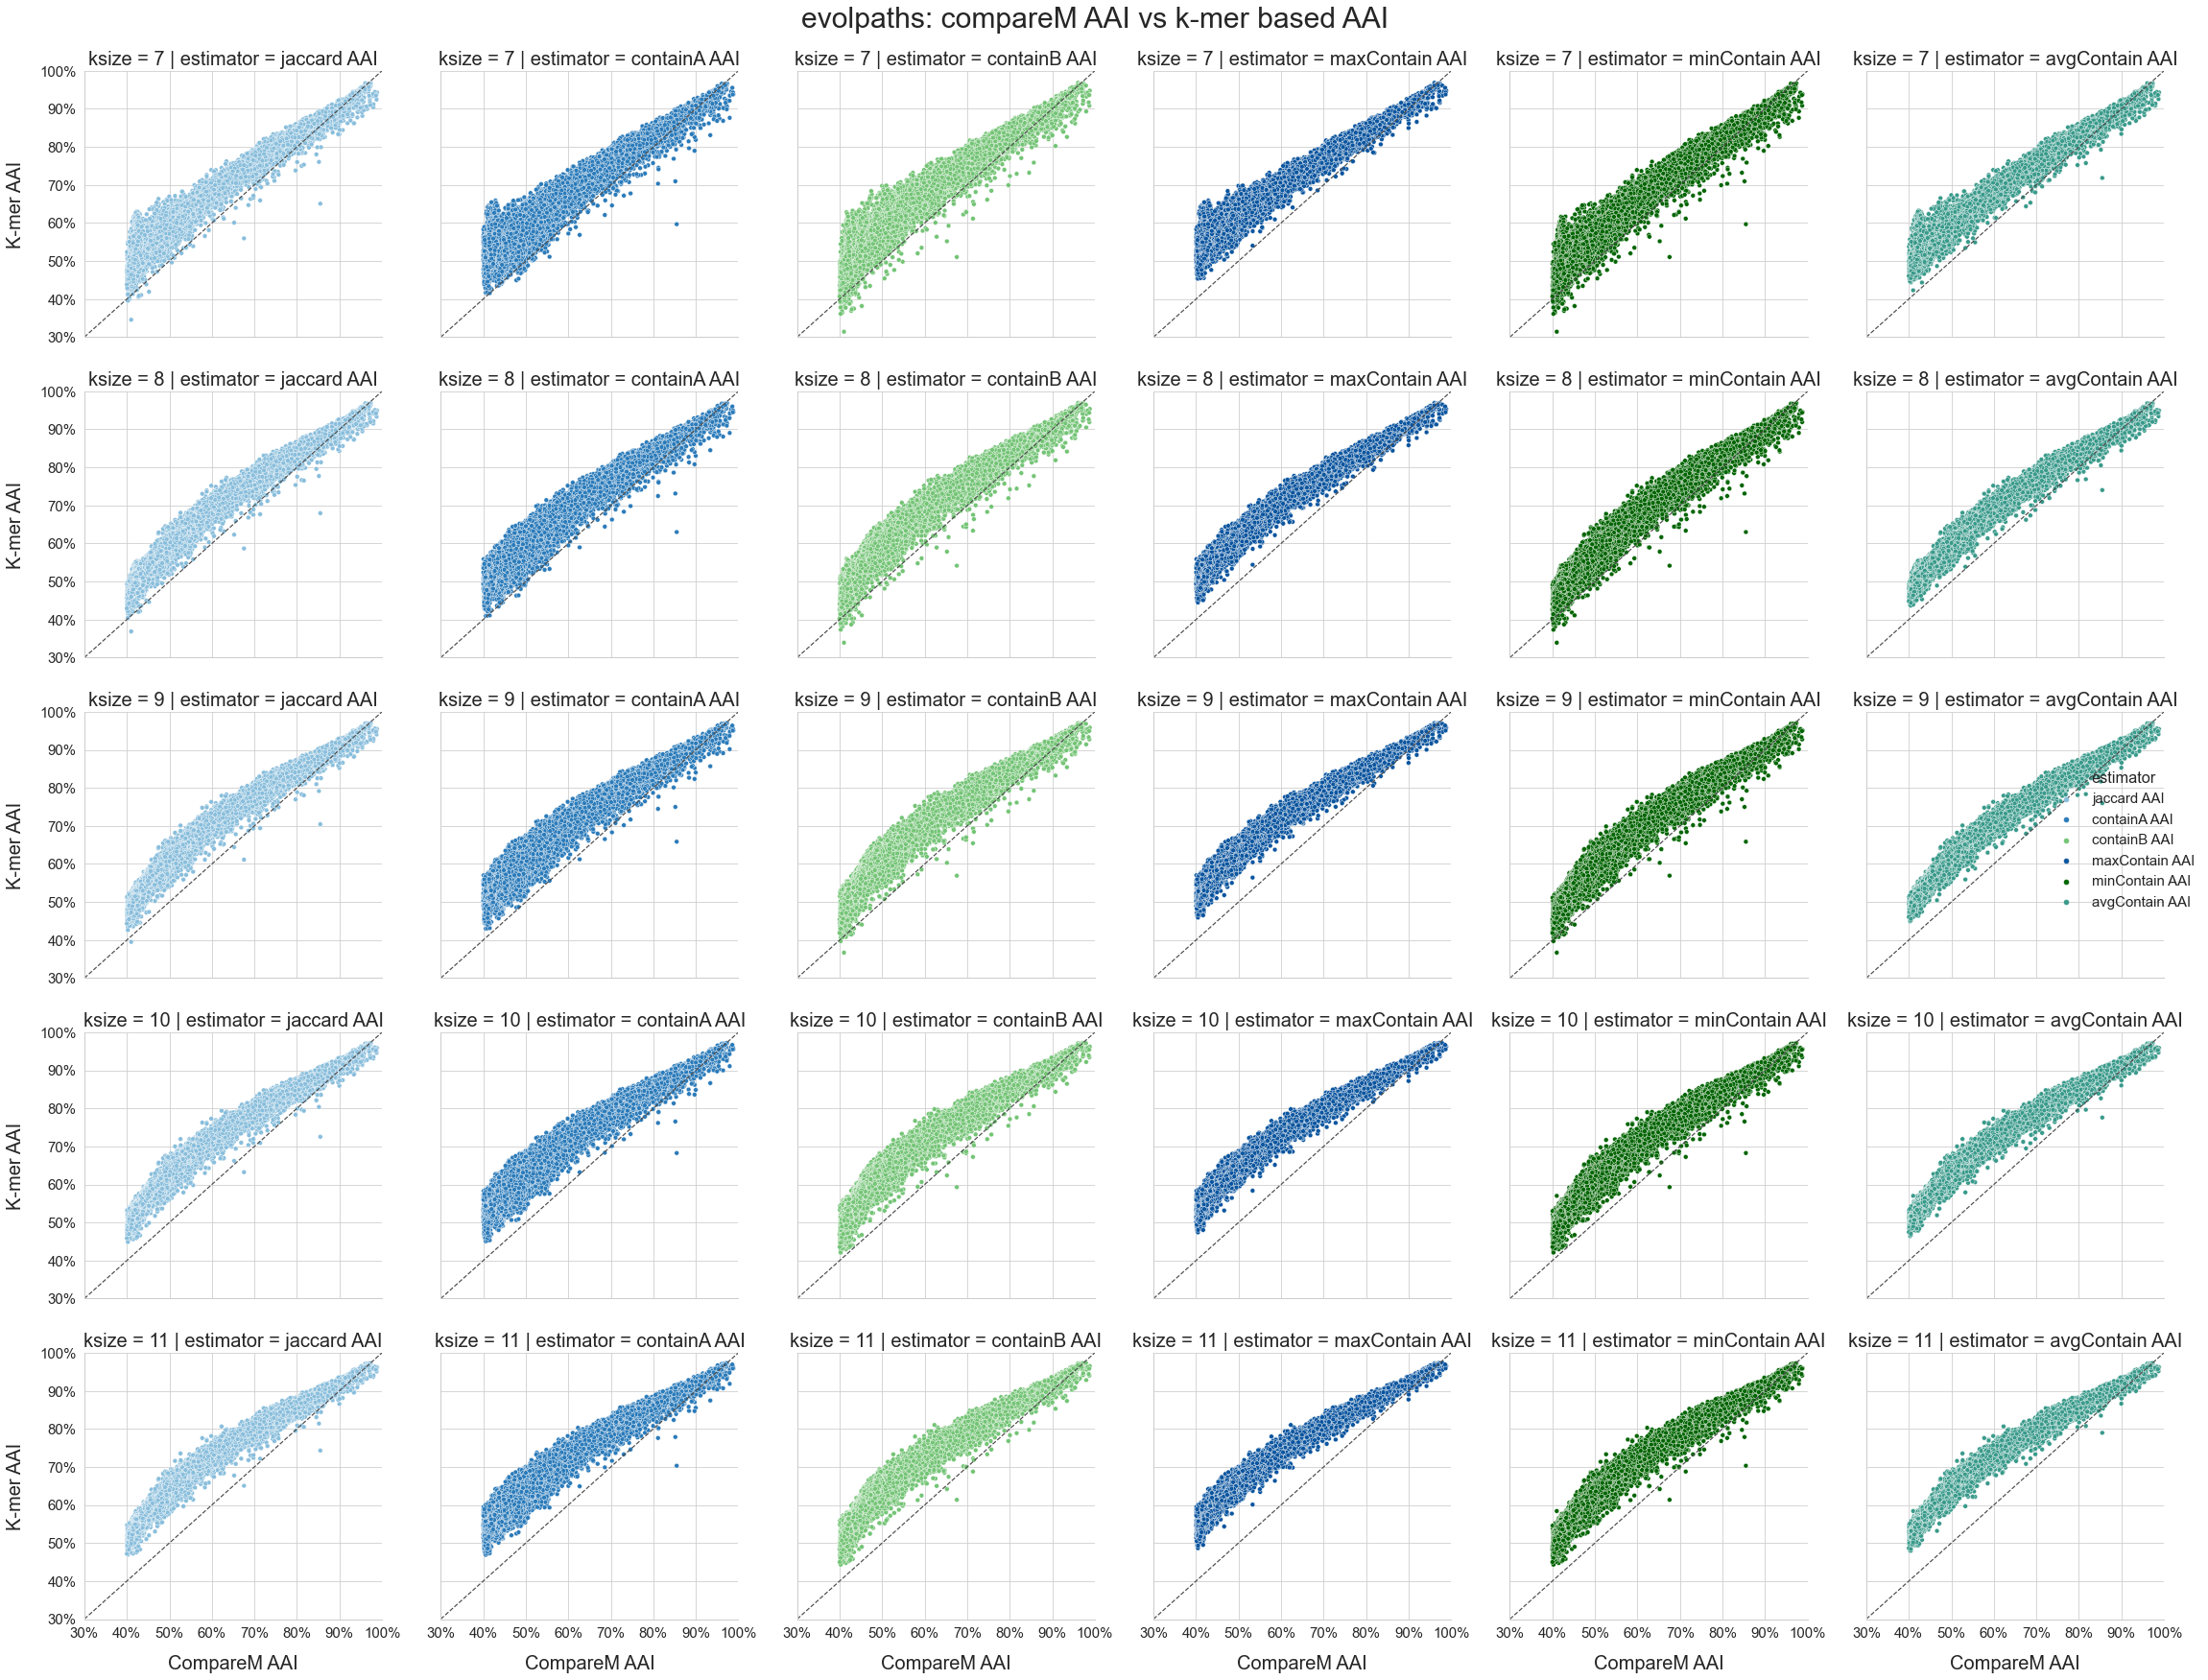

In [72]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1, 
                  x="compareM AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("CompareM AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: compareM AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [73]:
select_estimator = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
select_kmer = [7,10]

In [95]:
scaled1_select = scaled1[(scaled1["estimator"].isin(select_estimator)) & scaled1["ksize"].isin(select_kmer)]
scaled200_select = scaled200[(scaled200["estimator"].isin(select_estimator)) & scaled200["ksize"].isin(select_kmer)]

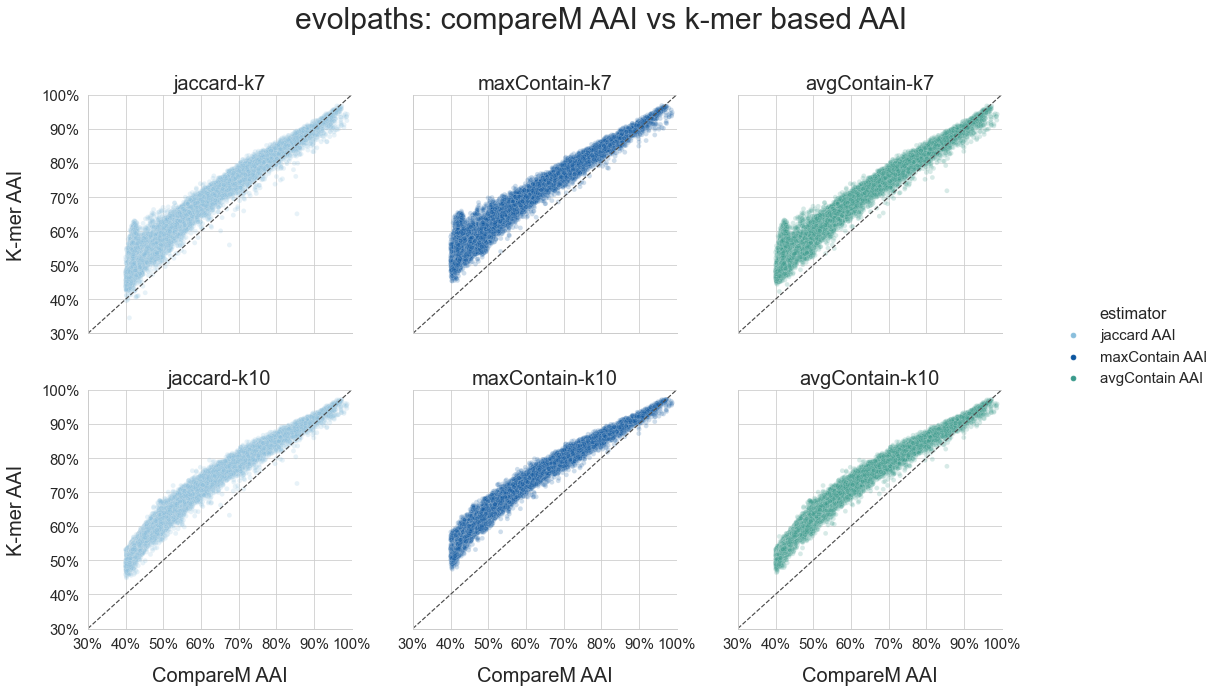

In [75]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1_select, 
                  x="compareM AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors, alpha=0.2)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title:
            new_title += "-k7"
        else:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
    g.set_axis_labels("CompareM AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: compareM AAI vs k-mer based AAI')
    g.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

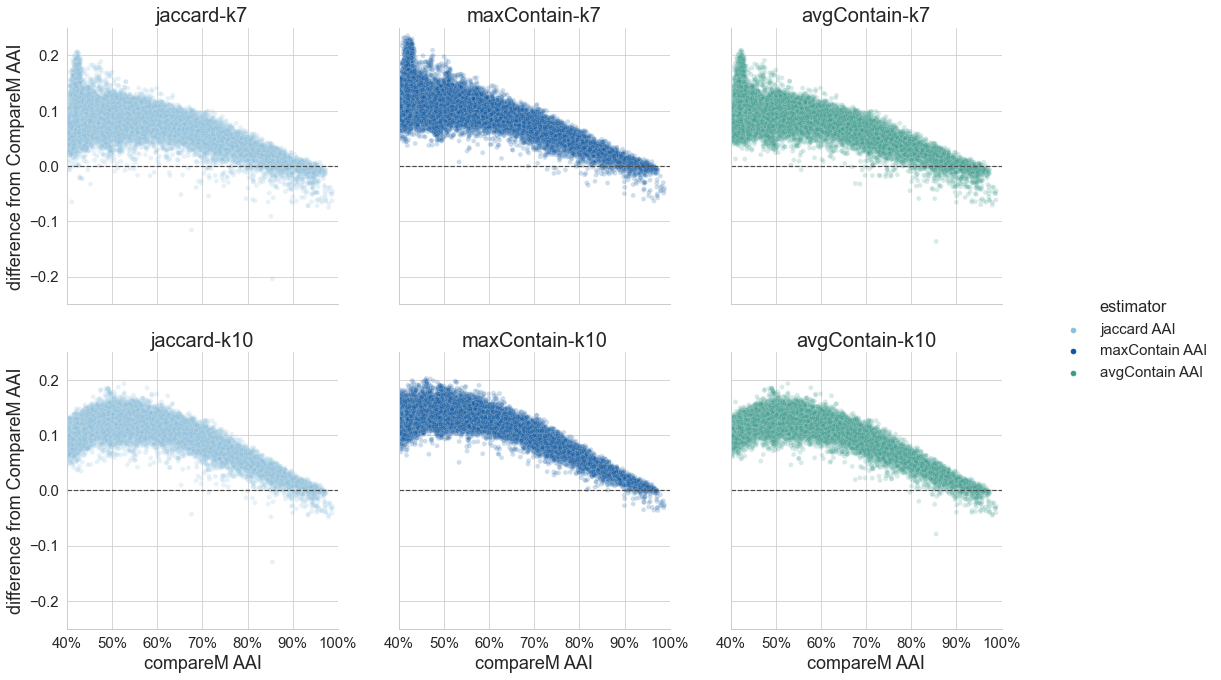

In [76]:
#sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled1_select, x="compareM AAI", y="AAIdiff", hue="estimator",col="estimator",row="ksize", palette=aai_colors, alpha=0.2)
    g.set(xlim=(.4, 1), ylim=(-0.25, 0.25))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("compareM AAI", size=18)
        ax.set_ylabel("difference from CompareM AAI", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
   #     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title:
            new_title += "-k7"
        else:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
    g.tight_layout()

In [96]:
scaled1_k10 = scaled1_select[scaled1_select['ksize'] == 10]
scaled1_k7 = scaled1_select[scaled1_select['ksize'] == 7]
scaled200_k10 = scaled200_select[scaled200_select['ksize'] == 10]
scaled200_k7 = scaled200_select[scaled200_select['ksize'] == 7]

In [78]:
scaled1_k10.tail()

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,compareM AAI,estimator,AAI,AAIdiff
2211267,GCA_002409405.1_x_GCA_001899145.1,path999,family,GCA_002409405.1,GCA_001899145.1,protein-10,protein,10,1,0.5983,avgContain AAI,0.746212,0.147912
2211270,GCA_002409405.1_x_GCA_013042625.1,path999,order,GCA_002409405.1,GCA_013042625.1,protein-10,protein,10,1,0.5172,avgContain AAI,0.649216,0.132016
2211273,GCA_002409405.1_x_GCA_002317435.1,path999,class,GCA_002409405.1,GCA_002317435.1,protein-10,protein,10,1,0.4829,avgContain AAI,0.589961,0.107061
2211276,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,protein-10,protein,10,1,0.4496,avgContain AAI,0.574107,0.124507
2211279,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,protein-10,protein,10,1,0.4195,avgContain AAI,0.533321,0.113821


## k10, scaled 1

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to CompareM AAI')

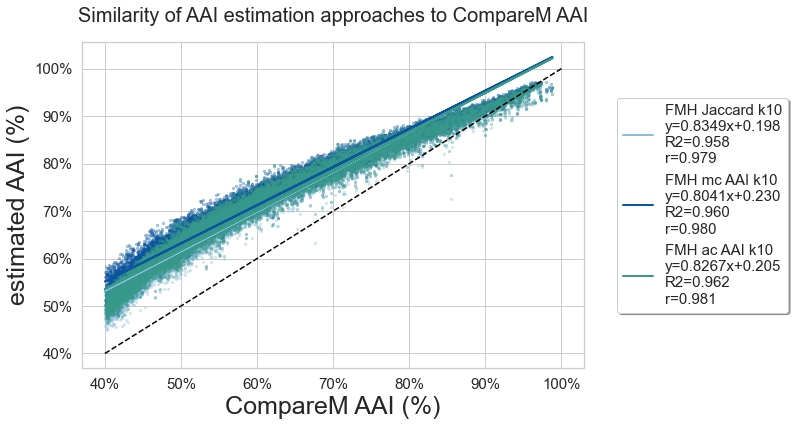

In [97]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled1_k10[scaled1_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)



## k7, scaled 1

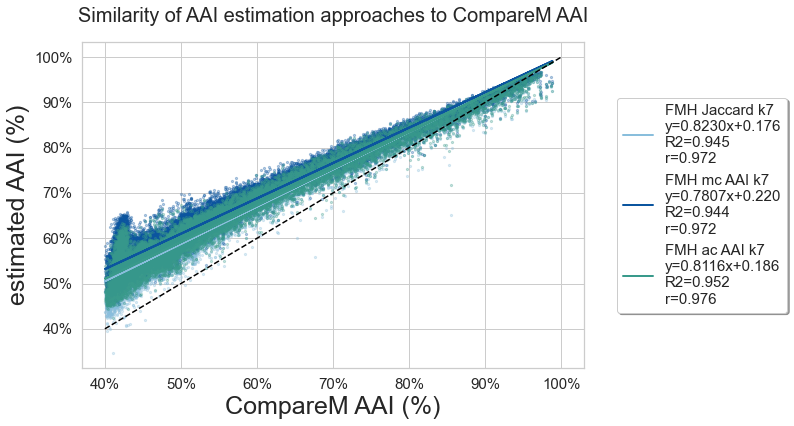

In [98]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled1_k7[scaled1_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled1.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## scaled 200, k7

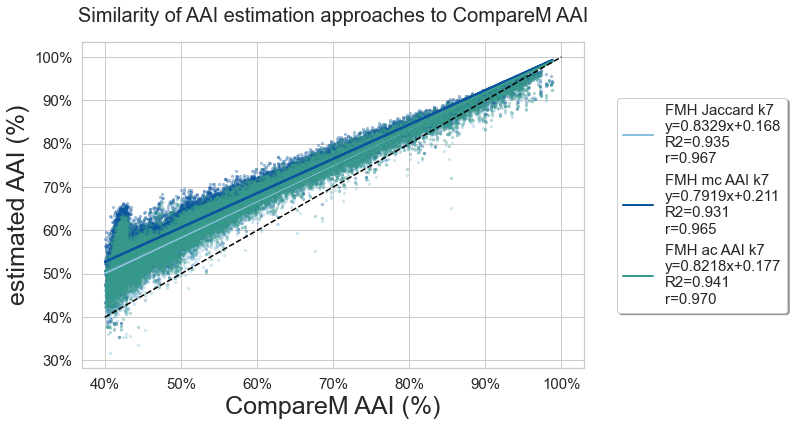

In [100]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled200_k7[scaled200_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# drop max Contain

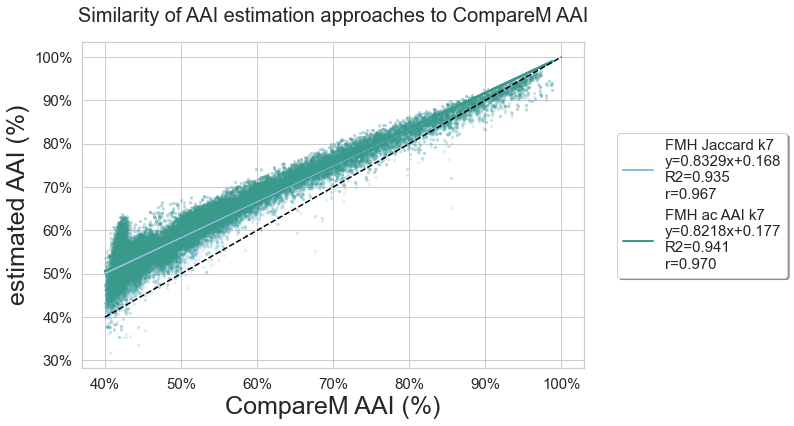

In [104]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "avgContain AAI"]#, "maxContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "compareM AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled200_k7[scaled200_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("CompareM AAI (%)", size=25)
#plt.legend(loc = 'best')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to CompareM AAI", pad=20, size=20)

fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.jac.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-compareM.scaled200.k7.jac.png", bbox_extra_artists=(lgd,), bbox_inches='tight')